Slope Forward  = 0.983 (esperado ~1)
Slope Backward = 1.015 (esperado ~1)
Slope Centered = 2.000 (esperado ~2)


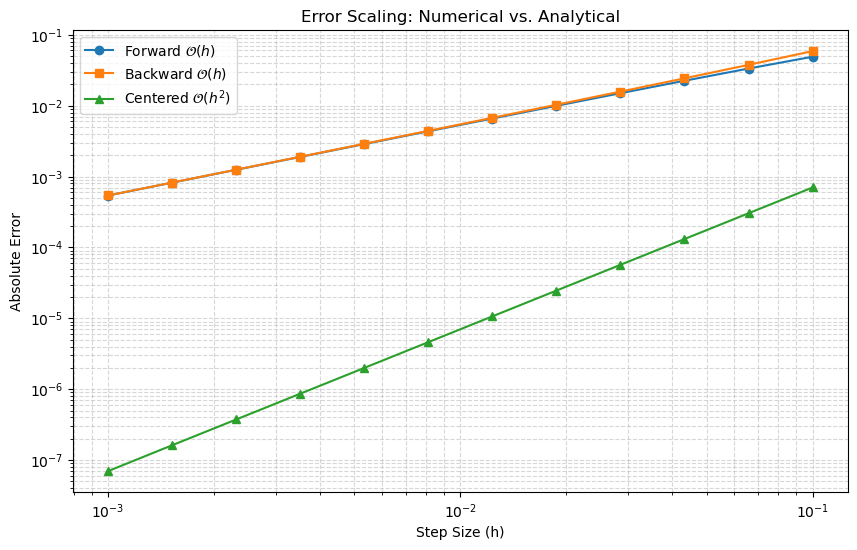

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# f(x) y segunda derivada exacta
f = np.sin
f2_exact = lambda x: -np.sin(x)

# Aproximaciones numéricas de f''(x)
def d2_forward(f, x, h):
    return (f(x + 2*h) - 2*f(x + h) + f(x)) / h**2   # O(h)

def d2_backward(f, x, h):
    return (f(x) - 2*f(x - h) + f(x - 2*h)) / h**2   # O(h)

def d2_centered(f, x, h):
    return (f(x + h) - 2*f(x) + f(x - h)) / h**2     # O(h^2)

# Parámetros pedidos
h_vals = np.logspace(np.log10(1e-3), np.log10(1e-1), 12)  # h: 0.001 -> 0.1, n=12
x0 = 1.0  # punto fijo

err_f, err_b, err_c = [], [], []

for h in h_vals:
    exact = f2_exact(x0)

    # arr_abs = abs(-sin(x0) - f_h'')
    arr_abs_f = abs(exact - d2_forward(f, x0, h))
    arr_abs_b = abs(exact - d2_backward(f, x0, h))
    arr_abs_c = abs(exact - d2_centered(f, x0, h))

    err_f.append(arr_abs_f)
    err_b.append(arr_abs_b)
    err_c.append(arr_abs_c)

err_f = np.array(err_f)
err_b = np.array(err_b)
err_c = np.array(err_c)

# Pendientes en log-log
m_f = np.polyfit(np.log(h_vals), np.log(err_f), 1)[0]
m_b = np.polyfit(np.log(h_vals), np.log(err_b), 1)[0]
m_c = np.polyfit(np.log(h_vals), np.log(err_c), 1)[0]

print(f"Slope Forward  = {m_f:.3f} (esperado ~1)")
print(f"Slope Backward = {m_b:.3f} (esperado ~1)")
print(f"Slope Centered = {m_c:.3f} (esperado ~2)")

# Gráfica como la del ejemplo
plt.figure(figsize=(10, 6))
plt.loglog(h_vals, err_f, '-o', label=r'Forward $\mathcal{O}(h)$')
plt.loglog(h_vals, err_b, '-s', label=r'Backward $\mathcal{O}(h)$')
plt.loglog(h_vals, err_c, '-^', label=r'Centered $\mathcal{O}(h^2)$')
plt.xlabel('Step Size (h)')
plt.ylabel('Absolute Error')
plt.title('Error Scaling: Numerical vs. Analytical')
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()


<div style="border: 3px solid #ff7fb6; border-radius: 18px; padding: 16px 20px; background: #fff0f7;">
<h3 style="margin-top: 0; color: #c2185b;">💖 Error Scaling de $f''(x)$</h3>

<b>1)</b> Definí $f(x)=\sin(x)$ y su derivada exacta $f''(x)=-\sin(x)$.  

<b>2)</b> Implementé tres esquemas:
- Forward → $\mathcal{O}(h)$  
- Backward → $\mathcal{O}(h)$  
- Centered → $\mathcal{O}(h^2)$  

<b>3)</b> Varié $h$ entre $10^{-3}$ y $10^{-1}$ y calculé el error absoluto en $x_0=1$.  

<b>4)</b> En gráfica log–log medí la pendiente:
- ≈1 confirma orden 1  
- ≈2 confirma orden 2  

<hr style="border: none; border-top: 1px solid #ffb6d3;">

✨ <b>Conclusión:</b>  
No todos los métodos son iguales. El centrado responde mejor cuando afino el paso 
ℎ
h.

</div>

